<a href="https://colab.research.google.com/github/orx-ali/skillsnetwork/blob/master/TensorFlow_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
import numpy as np

In [ ]:
celsius_q= np.array([-40, -10, 0, 8, 15, 22, 38], dtype="float")

In [ ]:
fahrenheit_a= np.array([-40, 14, 32, 46, 59, 72, 100], dtype="float")

In [ ]:
for i,c in enumerate(celsius_q):
  print("{} degree celcius = {} degrees Fahrenheit ".format(c, fahrenheit_a[i]))

-40.0 degree celcius = -40.0 degrees Fahrenheit 
-10.0 degree celcius = 14.0 degrees Fahrenheit 
0.0 degree celcius = 32.0 degrees Fahrenheit 
8.0 degree celcius = 46.0 degrees Fahrenheit 
15.0 degree celcius = 59.0 degrees Fahrenheit 
22.0 degree celcius = 72.0 degrees Fahrenheit 
38.0 degree celcius = 100.0 degrees Fahrenheit 


In [ ]:
l0= tf.keras.layers.Dense(units=1, input_shape=[1])

#Buradaki input_shape celcius'un 1 dimensional yani scalar bir buyukluk oldugunu gostermektedir.
#units kismi ise neural networkun layer sayisini gostermektedir.

In [ ]:
model= tf.keras.Sequential([l0])

#bu kisimda model tanimlanir

In [ ]:
model.compile(loss="mean_squared_error",
              optimizer= tf.keras.optimizers.Adam(0.1))

In [ ]:
history= model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)

In [ ]:
print("Finished train the model")

Finished train the model


In [ ]:
import matplotlib.pyplot as plt


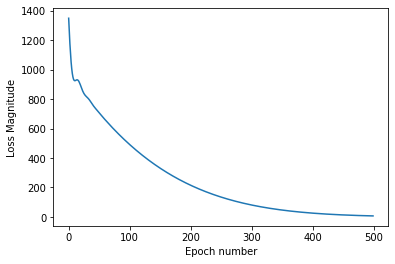

In [ ]:
plt.xlabel("Epoch number")
plt.ylabel("Loss Magnitude")
plt.plot(history.history["loss"])

In [ ]:
print(model.predict([100.0]))

[[211.33789]]


In [ ]:
#GRADIENT DESCENT: MACHINE LEARNINGDE OPTIMIZASYON SURECI OLARAK ADLANDIRILMAKTADIR. 
#FEATURE: INPUT OLARAK ADLANDIRILMAKTADIR. LABELS ISE HEDEF DEGISKENI OLARAK BILINMEKTEDIR. 
#LAYER: NEURAL NETWORKLARIN YERLESDIYI KATMANLARDIR. 
#LOSS: OUTPUT VE ACTUAL DEGERLER ARASINDAKI FARKTIR.
#DENSE AND FULLY CONNECTED: BIR LAYER ICINDEKI HER NODE, ONCEKI KATMANDAKI NODELER ILE BAGLANTILIDIR. ORNEGIN BIR ML MODELINDE:3 INPUT, VE 2 NEURAL NETWORK ve 1 outputun 
#OLMASI BEKLENIYORSA:
hidden= tf.keras.layers.Dense(units=2, input_shape=[3])
output= keras.layers.Dense(units=1)
model= tf.keras.Sequential([hidden, output])


#a1= x1*W11+b1
#Fahrenheit= C*1.8+32 (Buradaki C X1'e karsilik gelmekte olup, input variableni gostermektedir. 1.8 DENSE LAYERDEKI COEFFICIENT OLUP, W11 OLARAK GOSTERILMEKTEDIR. b1 ISE YINE NEURAL
                      #NETWORKDE YER ALAN SABIT DEGERI GOSTERMEKTEDIR)

#DENSE LAYERDEKI W11 VE B1 DEGERLERI GIBI COEFFICIENT VE SABIT DEGERLERI BULMAK ICIN:

print("These are the label variables: {}".format(l0.get_weights()))

These are the label variables: [array([[1.820482]], dtype=float32), array([29.289694], dtype=float32)]


In [ ]:
#RESIMLER UZERINDEKI ISLEMLER



#FLATTENING: 2 BOYUTLU RESMI 1 BOYUTLU VEKTORE DONUSTURUR
# RELU: NONLINEAR SORUNLARI COZMEYE YARAYAN AKTIVASYON FONKSIYONUDUR
# SOFTMAX: HER CIKTI ICIN IHTIMALI VERIR
# CLASSIFICATION: IKI VE DAHA FAZLA KATEGORI ARASINDA BOLUSTURME YAPMAYA IZIN VERIR


In [ ]:
#FLATTEN ISLEMINI GERCEKLESTIRME

tf.keras.layers.Flatten(input_shape=(28,28,1))

In [ ]:
#RELU ISLEMINI GERCEKLESTIRME

tf.keras.layers.Dense(128, activation=tf.nn.relu)

In [ ]:
#OUTPUT ISLEMLERINI GERCEKLESTIRME

tf.keras.layers.Dense(10, activation=tf.nn.softmax)

In [ ]:
#TENSORFLOW ISLEMLERINI DAHA HIZLI GERCEKLESTIREBILMEK ICIN:

#  RUNTIME-->CHANGE RUNTIME TYPE--> GPUYU SEC

In [ ]:
pip install -U tensorflow_datasets

     |████████████████████████████████| 4.0 MB 11.0 MB/s 
  Attempting uninstall: tensorflow-datasets
    Found existing installation: tensorflow-datasets 4.0.1
    Uninstalling tensorflow-datasets-4.0.1:
      Successfully uninstalled tensorflow-datasets-4.0.1


In [3]:
from __future__ import absolute_import, division, print_function

#import Tensorflow and TensorFlow Datasets

import tensorflow as tf
import tensorflow_datasets as tfds

#Helper Libraries
import math
import numpy as np
import matplotlib.pyplot as plt

#Improve progress bar display
import tqdm
import tqdm.auto
tqdm.tqdm= tqdm.auto.tqdm

print(tf.__version__)

2.6.0


In [5]:
dataset, metadata= tfds.load('fashion_mnist', as_supervised=True, with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling fashion_mnist-train.tfrecord...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling fashion_mnist-test.tfrecord...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [6]:
train_dataset, test_dataset= dataset['train'], dataset['test']

In [8]:
train_dataset

<PrefetchDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>

In [10]:
class_names = metadata.features['label'].names
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [12]:
print("Class_Names: {}".format(class_names))

Class_Names: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [13]:
num_train_examples = metadata.splits['train'].num_examples


In [14]:
num_test_examples = metadata.splits['test'].num_examples


In [15]:
print("Number of Training Examples: {}".format(num_train_examples))
print("Number of Test Examples: {}".format(num_test_examples))

Number of Training Examples: 60000
Number of Test Examples: 10000


**PREPROCESS THE DATA**
